In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, ShuffleSplit, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from IPython.display import display

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
njobs = 4
randomState = 0

In [2]:
# Load preprocessed data
data = pd.read_csv("cleanData/data.csv")
y = pd.read_csv("cleanData/y.csv", header = None)
y = y[0]

In [3]:
# SVM
svm = SVC(random_state = randomState)
train_sizes, train_scores, test_scores = learning_curve(estimator = svm, 
                                                        X = data, 
                                                        y = y,
                                                        train_sizes = np.linspace(start = 0.1, stop = 1.0, num = 10), 
                                                        cv = ShuffleSplit(n_splits = 5, 
                                                                          test_size = 0.25, 
                                                                          random_state = randomState), 
                                                        n_jobs = njobs)

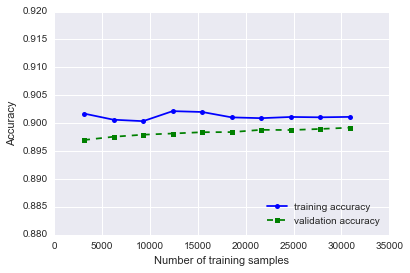

In [4]:
# Plot learning curve
train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(train_sizes, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(train_sizes, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.88, 0.92])
plt.show()

In [5]:
print("Accuracy with full training : " + str(test_means[9]) + ", similar to the score obtained with Logistic Regression")
print("No overfitting at all as long as we use at least about 18K training samples") 

Accuracy with full training : 0.899193939983, similar to the score obtained with Logistic Regression
No overfitting at all as long as we use at least about 15K training samples


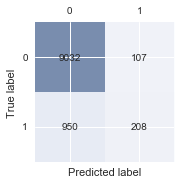

In [6]:
# Plotting the confusion matrix
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.25, random_state = randomState)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
confmat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.5)
for i in range(confmat.shape[0]) :
    for j in range(confmat.shape[1]) : 
        ax.text(x = j, y = i, s = confmat[i, j], va = "center", ha = "center")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [7]:
print("SVM takes way too long, so we won't try tuning the parameters for this model")

SVM takes way too long, so we won't try tuning the parameters for this model
